In [119]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
import nltk


In [121]:
df = pd.read_excel(r"C:/Users/Yash/Downloads/World_Bank_Projects_downloaded_6_15_2022.xls",)

In [122]:
df.head(5)

,Project_Status,Project_Objective
0,Active,The Program Development Objective is to expand...
1,Active,The project will deliver sustainable climate r...
2,Dropped,To improve citizen and government access to co...
3,Pipeline,To increase utilization and quality of reprodu...
4,Pipeline,"The project Development Objective (PDO) is ""to..."


In [123]:
df.shape

(21543, 2)

In [124]:
df.describe()

,Project_Status,Project_Objective
count,21538,11579
unique,4,9861
top,Closed,Project Development Objective (Note: will be d...
freq,15783,47


In [125]:
df.isnull().sum()                             

Project_Status          5
Project_Objective    9964
dtype: int64

In [126]:
df1 = df.dropna()                 #removing the null value

In [127]:
df1.shape

(11576, 2)

In [128]:
df1.describe()

,Project_Status,Project_Objective
count,11576,11576
unique,4,9858
top,Closed,Project Development Objective (Note: will be d...
freq,6500,47


In [129]:
df1.Project_Status.value_counts()

Closed      6500
Active      3062
Dropped     1100
Pipeline     914
Name: Project_Status, dtype: int64

In [130]:
d1 = df1.Project_Objective.apply(len)              #calculating the length of the sentences
d1

0        1408
1         103
2         276
3         132
4         191
         ... 
21185     151
21332     372
21334     661
21470     145
21535     322
Name: Project_Objective, Length: 11576, dtype: int64

In [131]:
df1 = pd.concat([df1,d1],axis = 1)  

In [132]:
df1.head(10)

,Project_Status,Project_Objective,Project_Objective
0,Active,The Program Development Objective is to expand...,1408
1,Active,The project will deliver sustainable climate r...,103
2,Dropped,To improve citizen and government access to co...,276
3,Pipeline,To increase utilization and quality of reprodu...,132
4,Pipeline,"The project Development Objective (PDO) is ""to...",191
5,Pipeline,"to improve access to, and efficiency of, water...",105
6,Pipeline,to build human capital development in The Gambia,48
7,Pipeline,Improve water security and increase the econom...,107
8,Pipeline,To develop three-dimensional (3D) city models ...,114
9,Pipeline,The Program Development Objective is to suppor...,261


In [133]:
df1.columns.values[2] = "length"

In [134]:
df1


,Project_Status,Project_Objective,length
0,Active,The Program Development Objective is to expand...,1408
1,Active,The project will deliver sustainable climate r...,103
2,Dropped,To improve citizen and government access to co...,276
3,Pipeline,To increase utilization and quality of reprodu...,132
4,Pipeline,"The project Development Objective (PDO) is ""to...",191
...,...,...,...
21185,Closed,The revised PDO is to (i) improve access and e...,151
21332,Closed,The project development objective i s to assis...,372
21334,Closed,The objectives of the Project are to assist th...,661
21470,Dropped,ENERGY SECTOR PROJECT INCLUDES POWER COMPONENT...,145


# dropping the extra status variable

In [135]:
train = df1.copy()

In [136]:
train.drop(train[(train['Project_Status'] == "Active")].index, inplace=True)

In [137]:
train.drop(train[(train['Project_Status'] == "Pipeline")].index, inplace=True)

In [138]:
from nltk.corpus import stopwords

In [139]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [141]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return[word for word in nopunc.split()if word not in stopwords.words("english")]

In [142]:
train["Project_Objective"].apply(text_process)                

2        [To, improve, citizen, government, access, cou...
194      [The, Project, Development, Objective, PDO, Op...
258      [To, strengthen, capacity, Romanian, instituti...
473      [The, development, objective, increase, energy...
657      [To, improve, living, conditions, vulnerable, ...
                               ...                        
21185    [The, revised, PDO, improve, access, equity, p...
21332    [The, project, development, objective, assist,...
21334    [The, objectives, Project, assist, Borrower, i...
21470    [ENERGY, SECTOR, PROJECT, INCLUDES, POWER, COM...
21535    [THE, PROJECT, WILL, A, PROMOTE, SKILLS, DEVEL...
Name: Project_Objective, Length: 7600, dtype: object

In [32]:
from wordcloud import WordCloud

In [33]:
cloud = WordCloud().generate(str(train["Project_Objective"]))

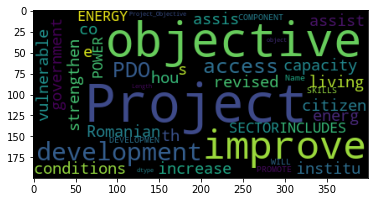

In [34]:
plt.imshow(cloud)

In [35]:
train_dropped = train[train.Project_Status == "Dropped"]                 
train_dropped

,Project_Status,Project_Objective,length
2,Dropped,To improve citizen and government access to co...,276
194,Dropped,The Project Development Objective (PDO) of the...,277
258,Dropped,To strengthen the capacity of Romanian institu...,180
473,Dropped,The development objective is to increase energ...,165
657,Dropped,To improve living conditions of vulnerable hou...,164
...,...,...,...
20335,Dropped,"TO PROVIDE ADDITIONAL CAPACITY, IMPROVE GENERA...",114
20569,Dropped,ADAPTABLE PROGRAM LOAN FOR STRENGTHENING PRIMA...,72
20847,Dropped,TO PROVIDE A RELIABLE AND POTABLE WATER SUPPLY...,283
21470,Dropped,ENERGY SECTOR PROJECT INCLUDES POWER COMPONENT...,145


In [40]:
wc = WordCloud(max_words = 50)

In [41]:
cloud_dropped = wc.generate(str(train_dropped.Project_Status))

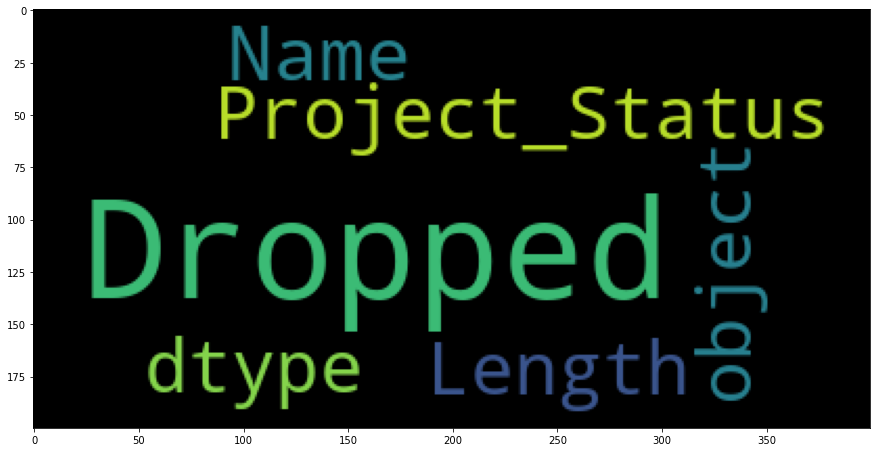

In [42]:
fig = plt.figure(figsize = (15,15))
plt.imshow(cloud_dropped)

In [43]:
train_closed  = train[train.Project_Status == "Closed"]
train_closed

,Project_Status,Project_Objective,length
666,Closed,The program development objective is to suppor...,354
754,Closed,The grant development objective is to improve ...,146
1050,Closed,To facilitate Sudan's re-engagement with the W...,509
1056,Closed,To provide economic support to help mitigate t...,175
1082,Closed,The operation seeks to support Dominica in its...,269
...,...,...,...
20854,Closed,The projects development objective is to supp...,615
20874,Closed,Improve rural income generation through increa...,158
21185,Closed,The revised PDO is to (i) improve access and e...,151
21332,Closed,The project development objective i s to assis...,372


In [44]:
cloud_closed = wc.generate(str(train_closed.Project_Status))

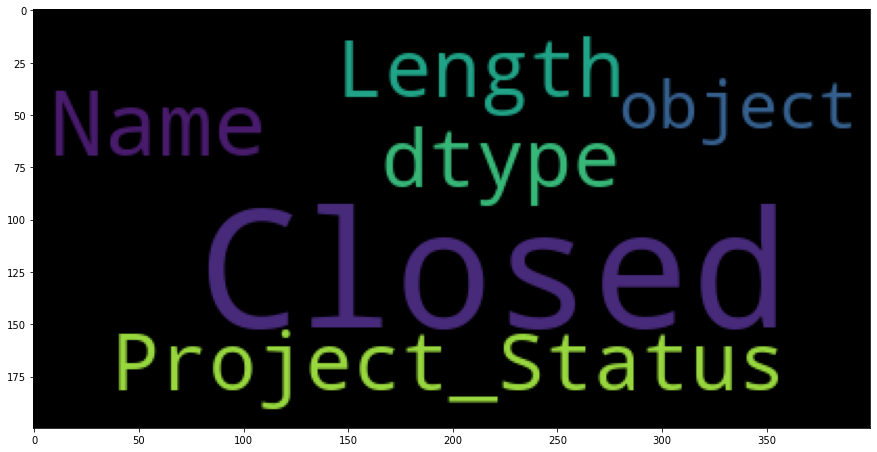

In [45]:
fig = plt.figure(figsize = (15,15))
plt.imshow(cloud_closed)

In [46]:
from sklearn.feature_extraction.text  import CountVectorizer

In [47]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(train["Project_Objective"])
bow_transformer.vocabulary_

{'To': 10178,
 'improve': 16355,
 'citizen': 12641,
 'government': 15747,
 'access': 10990,
 'county': 13407,
 'data': 13583,
 'open': 18693,
 'portal': 19384,
 'facilitate': 15109,
 'monitoring': 17989,
 'evaluation': 14895,
 'progress': 19743,
 'service': 21193,
 'delivery': 13720,
 'achieving': 11068,
 'twin': 22782,
 'targets': 22166,
 'poverty': 19449,
 'reduction': 20226,
 'shared': 21241,
 'prosperity': 19829,
 'level': 17300,
 'The': 10126,
 'Project': 8320,
 'Development': 3293,
 'Objective': 7289,
 'PDO': 7559,
 'Operation': 7342,
 'quality': 19961,
 'governance': 15737,
 'school': 20974,
 'education': 14350,
 'selected': 21098,
 'st': 21599,
 'ates': 11836,
 'quali': 19955,
 'ty': 22796,
 'states': 21671,
 'strengthen': 21786,
 'capacity': 12385,
 'Romanian': 8899,
 'institutions': 16727,
 'respond': 20594,
 'COVID19': 2407,
 'pandemic': 18948,
 'ensure': 14680,
 'adequate': 11152,
 'emergency': 14504,
 'surge': 22030,
 'capac': 12378,
 'ity': 17007,
 'safety': 20905,
 'publ

In [48]:
len(bow_transformer.vocabulary_)

23636

In [49]:
mess_bow = bow_transformer.transform(train["Project_Objective"])

In [50]:
type(mess_bow)

scipy.sparse.csr.csr_matrix

In [51]:
mess_bow.shape


(7600, 23636)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
TT  = TfidfTransformer()

In [54]:
TT.fit(mess_bow)

TfidfTransformer()

In [55]:
TT_mess = TT.transform(mess_bow)
TT_mess

<7600x23636 sparse matrix of type '<class 'numpy.float64'>'
	with 261547 stored elements in Compressed Sparse Row format>

In [56]:
train.Project_Status = le.fit_transform(train.Project_Status)


In [80]:
train.Project_Status.value_counts()

0    6500
1    1100
Name: Project_Status, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression 
lm = LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
lm.fit(TT_mess,train.Project_Status)

LogisticRegression()

In [60]:
pred1 = lm.predict(TT_mess)

In [61]:
cf = confusion_matrix(pred1,train.Project_Status)
cf

array([[6479,  940],
       [  21,  160]], dtype=int64)

In [143]:
acc = cf.diagonal().sum()/cf.sum()*100
acc

87.35526315789474

In [63]:
print(classification_report(pred1,train.Project_Status))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7419
           1       0.15      0.88      0.25       181

    accuracy                           0.87      7600
   macro avg       0.57      0.88      0.59      7600
weighted avg       0.98      0.87      0.91      7600



In [81]:
from sklearn import metrics
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

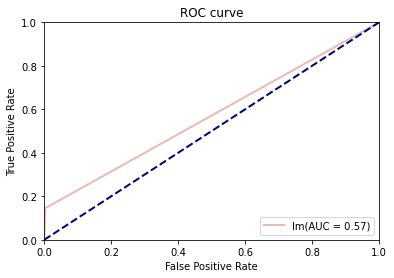

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [82]:
plotAUC(train.Project_Status,pred1,"lm")
plt.show()
plt.figure(figsize  =(6,6))

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [65]:
rf.fit(TT_mess,train.Project_Status)

RandomForestClassifier()

In [67]:
pred2 = rf.predict(TT_mess)

In [68]:
cf1 = confusion_matrix(pred2,train.Project_Status)
cf1

array([[6498,   15],
       [   2, 1085]], dtype=int64)

In [69]:
acc1 = cf1.diagonal().sum()/cf1.sum()*100
acc1

99.77631578947368

In [70]:
print(classification_report(pred2,train.Project_Status))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6513
           1       0.99      1.00      0.99      1087

    accuracy                           1.00      7600
   macro avg       0.99      1.00      1.00      7600
weighted avg       1.00      1.00      1.00      7600



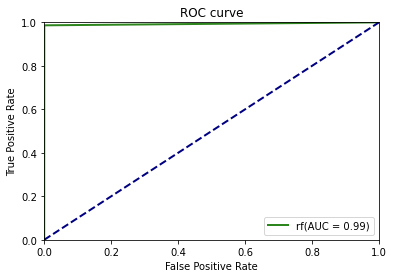

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [83]:
plotAUC(train.Project_Status,pred2,"rf")
plt.show()
plt.figure(figsize  =(6,6))

In [71]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [72]:
nb.fit(TT_mess,train.Project_Status)

MultinomialNB()

In [73]:
pred3 = nb.predict(TT_mess)

In [74]:
cf2 = confusion_matrix(pred3,train.Project_Status)
cf2

array([[6447,  943],
       [  53,  157]], dtype=int64)

In [75]:
acc2 = cf2.diagonal().sum()/cf2.sum()*100
acc2

86.89473684210526

In [76]:
print(classification_report(pred3,train.Project_Status))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      7390
           1       0.14      0.75      0.24       210

    accuracy                           0.87      7600
   macro avg       0.57      0.81      0.58      7600
weighted avg       0.97      0.87      0.91      7600



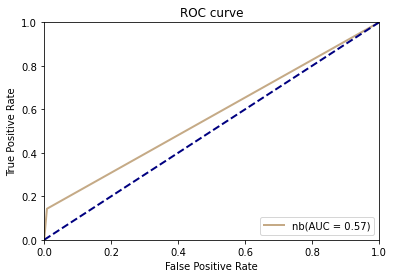

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [84]:
plotAUC(train.Project_Status,pred3,"nb")
plt.show()
plt.figure(figsize  =(6,6))